**LOAN APPROVAL**<br>
**Objective** Determine what factors tends to have influence over the loan approval of someone and suggest a model that can be use to predict the Loan Status

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import statistics


print(plt.style.available)
plt.style.use('dark_background')

print("Done")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Done


In [2]:
#Lets load the data and have the general overview of what we have in our dataset
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Jack\Loan_Approval\loan_approval_dataset.csv")
print(df.dtypes)
print("- - - - - - - - - - - - - - - - - - - - -")
print(df.head(5))

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object
- - - - - - - - - - - - - - - - - - - - -
   loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score

**Data Cleaning**

In [3]:
#Lets start our analysis by checking for null values and duplicates
print(df.columns[df.isnull().any()])
print("- - - - - - - ")
print(df[df.duplicated()])
print("- - - - - - - ")
print(df[df.isnull()])
print(df.head(5))

Index([], dtype='object')
- - - - - - - 
Empty DataFrame
Columns: [loan_id, no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []
- - - - - - - 
      loan_id  no_of_dependents education self_employed  income_annum  \
0         NaN               NaN       NaN           NaN           NaN   
1         NaN               NaN       NaN           NaN           NaN   
2         NaN               NaN       NaN           NaN           NaN   
3         NaN               NaN       NaN           NaN           NaN   
4         NaN               NaN       NaN           NaN           NaN   
...       ...               ...       ...           ...           ...   
4264      NaN               NaN       NaN           NaN           NaN   
4265      NaN               NaN       NaN           NaN           NaN   
4266      NaN               NaN       NaN   

In [4]:
#Lets start our data cleaning process by changing the data types of various columns

print(df.dtypes)

df['loan_id'] = df['loan_id'].astype('category')
df['education'] = df['education'].astype('category')
df['self_employed'] = df['self_employed'].astype('category')
df['no_of_dependents'] = df['no_of_dependents'].astype(np.int8)

print(df.dtypes)

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object
loan_id                     category
no_of_dependents                int8
education                   category
self_employed               category
income_annum                   int64
loan_amount                    int64
loan_term                      int64
cibil_score                    int64
residential_assets_value       int64
commercial_assets_value        int64
luxury_assets_value            int64
bank_asset_value               int64
loan_status                   object
dtype: object


**Outliers**<br>
There are 2 main ways that we can detect outliers, for this project, I will use Mean +/- 3 Standard Deviation because of expecting the huge variations/difference between the data

In [5]:
#Lets try to check for outliers in our data
x = len(df)

def outliers(x):
    Arithmetic_mean = statistics.mean(x)
    Standard_Deviation = statistics.stdev(x)

    upper = Arithmetic_mean + (3*Standard_Deviation)
    lower = Arithmetic_mean - (3*Standard_Deviation)

    outlier = df[(x<lower) | (x>upper)]
    print(outlier)
    print(len(outlier))

    if len(outlier) > 0:
        df.drop(df[x < lower].index, inplace=True)
        df.drop(df[x > upper].index, inplace=True)

        Arithmetic_mean = statistics.mean(x)
        Standard_Deviation = statistics.stdev(x)
        upper = Arithmetic_mean + (3*Standard_Deviation)
        lower = Arithmetic_mean - (3*Standard_Deviation)
        outlier = df[(x<lower) | (x>upper)]
        print(outlier)
        print(len(outlier))
    else:
        print("No outlier Detected\n\n\n\n")


    del outlier
    del lower
    del upper
    del Arithmetic_mean
    del Standard_Deviation

    return '- - - - - - - - - - - -- - - - - -'

print('Income annum outliers')
outliers(df['income_annum'])
print('Loan Amount Outliers')
outliers(df['loan_amount'])
print('residential_assets_value')
outliers(df['residential_assets_value'])
print('commercial asset value')
outliers(df['commercial_assets_value'])
print('luxury_assets_value')
outliers(df['luxury_assets_value'])
print('bank_asset_value')
outliers(df['bank_asset_value'])
print('Credit Score')
outliers(df['cibil_score'])

#Using online search, a credit score cannot be greater than 850
print(df[df['cibil_score']>850])
df.drop(df[df['cibil_score']>850].index, inplace=True)
y = len(df)

print("Number of records befor Trimming", x)
print("Number of records after trimming",y)
print(x-y, "Records have been removed")

del x
del y


Income annum outliers
Empty DataFrame
Columns: [loan_id, no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []
0
No outlier Detected




Loan Amount Outliers
Empty DataFrame
Columns: [loan_id, no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []
0
No outlier Detected




residential_assets_value
     loan_id  no_of_dependents      education self_employed  income_annum  \
714      715                 4   Not Graduate            No       9900000   
892      893                 4       Graduate            No       9300000   
905      906                 5   Not Graduate            No       9700000   
987      988                 5       Graduate            No       9400000   
1468    1

C:\Users\hp\AppData\Local\Temp\ipykernel_4808\3711402460.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier = df[(x<lower) | (x>upper)]
C:\Users\hp\AppData\Local\Temp\ipykernel_4808\3711402460.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier = df[(x<lower) | (x>upper)]
C:\Users\hp\AppData\Local\Temp\ipykernel_4808\3711402460.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier = df[(x<lower) | (x>upper)]


In [6]:
#Lets rename some columns so that someone can easily understand them and to add a new column
try:
    df.rename(columns={'education':'Education Level','income_annum':'Annual Income','cibil_score':'Credit Score','loan_status':'Loan Status'},inplace=True)
except:
    print("The column names were already updated")
finally:
    df['Monthly Income'] = round((df['Annual Income']/12),2)
    df['Annual Income to Loan Amount Ratio'] = round(((df['Annual Income'])/(df['loan_amount'])),4)


**Summary**<br>
Since our data is clean, we can have a look at the general description before we start our analysis

In [7]:
print(df.dtypes)
print("\n")
print(pd.DataFrame(df.describe()))
print('\n')
print(df.groupby('Loan Status')['loan_id'].count())

loan_id                               category
no_of_dependents                          int8
Education Level                       category
self_employed                         category
Annual Income                            int64
loan_amount                              int64
loan_term                                int64
Credit Score                             int64
residential_assets_value                 int64
commercial_assets_value                  int64
luxury_assets_value                      int64
bank_asset_value                         int64
Loan Status                             object
Monthly Income                         float64
Annual Income to Loan Amount Ratio     float64
dtype: object


       no_of_dependents  Annual Income   loan_amount    loan_term  \
count       3902.000000   3.902000e+03  3.902000e+03  3902.000000   
mean           2.489493   5.051461e+06  1.510779e+07    10.895438   
std            1.694198   2.779663e+06  8.947552e+06     5.713203   
min

**Statistical Analysis**<br>
**Q1. Does credit score have a relationship with the loan approval?**

In [8]:
print(df.groupby('Loan Status',observed=True)[['loan_amount','Credit Score']].corr())
print('\n \n')


                          loan_amount  Credit Score
Loan Status                                        
Approved    loan_amount      1.000000     -0.049495
            Credit Score    -0.049495      1.000000
Rejected    loan_amount      1.000000      0.005129
            Credit Score     0.005129      1.000000

 



Lets analyse the relationship between loan approval and credit score, since we are analyzing 2 categories with numerics, we can use  various statistical tests but i choose to use **ttest**<br>
**T-TEST** is a statistical test used to evaluate if their is a statistical difference between 2 groups or a group and the hypothesized mean. The Hypotheis being tested are:<br>
H<sub>0</sub> We test if the two population means are equal. We accept H<sub>0</sub> if the p_value > 0.05<br>
H<sub>1</sub> We test if the two population means differnce are statistically significant. We accept H<sub>1</sub> if the p_value > 0.05<br>
#Lets start by dividing the records to 2, that is approved and rejected

In [9]:
Approved= df[df['Loan Status'] == ' Approved'][['Credit Score','loan_id']]
Rejected= df[df['Loan Status'] == ' Rejected'][['Credit Score']]
print(Approved.shape)
print(Rejected.columns)

print(stats.ttest_ind(Approved['Credit Score'], Rejected['Credit Score']))
print("Since the P_value is approximately 0, we conclude that the credit score tends to affect the statust of someones loan")

try:
    del Approved
    del Rejected
except:
    print("DataFrames not found")


(2304, 2)
Index(['Credit Score'], dtype='object')
TtestResult(statistic=76.33521107061947, pvalue=0.0, df=3900.0)
Since the P_value is approximately 0, we conclude that the credit score tends to affect the statust of someones loan


Since the **P_value is approximately 0**,we have enough evidence that their is a statistically significant difference to **Reject H<sub>0</sub> and conclude that the credit score** tends to affect the status of someones' loan status

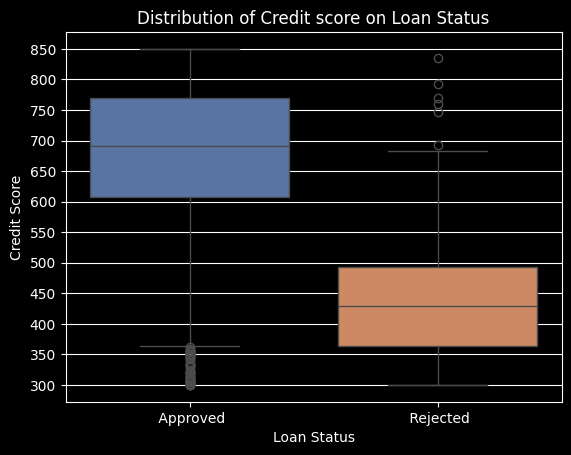

In [10]:
import matplotlib.ticker as ticker
plt.grid()
sns.boxplot(x='Loan Status',y='Credit Score',data=df,palette='deep',hue='Loan Status',legend=False)
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=50))
plt.title("Distribution of Credit score on Loan Status")
plt.show()

Using the box plot above, we can see that majority (more than half) of people who are being accepted for a loan have higher credit score, that is they have a credit score of 600 and above **25<sup>th</sup> percentile** is at approximately 610 with the highest having a credit score of 850 and the least with approximately 300. This shows that as much as having a higher credit score tends to give you a higher chance of being accepted for a loan, it doesn't guarantee the chance since also for the Rejection plot, more than half of the people having a low credit score that is of below 500 have been rejected. But some people who have a credit score of above 750 have their loans rejected for some other reasons. <br>
Why?🤔🤔<br>
In conclusion, credit score tends to have an influence over the loans status

**Q2. Is there a relationship between income level, credit score, and loan status?**<br>
Is there a relationship between credit score and income level

In [11]:
print(pd.DataFrame(df.groupby('Loan Status',observed=True)[['Annual Income','Monthly Income','Credit Score']].corr()))
print(df['Annual Income'].corr(df['Credit Score']))
df["Credit Score"] = df["Credit Score"].astype('category')

anova = ols('Q("Annual Income") ~ Q("Credit Score")',data=df).fit()
print(sm.stats.anova_lm(anova,type=2))

del anova
df["Credit Score"] = df["Credit Score"].astype(np.int16)


                            Annual Income  Monthly Income  Credit Score
Loan Status                                                            
Approved    Annual Income        1.000000        1.000000      0.005054
            Monthly Income       1.000000        1.000000      0.005054
            Credit Score         0.005054        0.005054      1.000000
Rejected    Annual Income        1.000000        1.000000     -0.008764
            Monthly Income       1.000000        1.000000     -0.008764
            Credit Score        -0.008764       -0.008764      1.000000
-0.006757959146569174
                       df        sum_sq       mean_sq         F    PR(>F)
Q("Credit Score")   550.0  4.211851e+15  7.657911e+12  0.989677  0.557126
Residual           3351.0  2.592934e+16  7.737790e+12       NaN       NaN


Using correlation and ANOVA table, we dont have enough evidence to conclude that credit score have a relationship with the income one is expecting<br>
Is there a relationship between loan status and income level?🤔🤔

In [12]:
Approved= df[df['Loan Status'] == ' Approved'][["Annual Income","loan_id"]]
Rejected= df[df['Loan Status'] == ' Rejected'][["Annual Income","loan_id"]]
print(Approved.shape)
print(Rejected.shape)

print(stats.ttest_ind(Approved["Annual Income"], Rejected["Annual Income"]))
print("Since the P_value is 0.5616438638489933, we have strong evidence to conclude that the income someone gets doesnt affect the loan status")

try:
    del Approved
    del Rejected
except:
    print("DataFrames not found")

(2304, 2)
(1598, 2)
TtestResult(statistic=-0.5804512864342836, pvalue=0.5616438638489933, df=3900.0)
Since the P_value is 0.5616438638489933, we have strong evidence to conclude that the income someone gets doesnt affect the loan status


**Q3. Do factors like the number of dependents, education level, and self-employment have a relationship with the credit score?**

In [13]:
#What is the different number of dependents and distribution
print(pd.DataFrame(df.groupby('no_of_dependents',observed=True)['loan_id'].count()))
print('\n')
#Does Number of dependents affect the creditr score?
df['no_of_dependents'] = df['no_of_dependents'].astype('category')

print(sm.stats.anova_lm((ols('Q("Credit Score")~no_of_dependents', data=df).fit()),type=2))
print('\n')

#Does the number of dependents affect the loan amount
print(sm.stats.anova_lm((ols('Q("loan_amount")~no_of_dependents', data=df).fit()),type=2))

                  loan_id
no_of_dependents         
0                     657
1                     633
2                     652
3                     673
4                     677
5                     610


                      df        sum_sq       mean_sq         F    PR(>F)
no_of_dependents     5.0  4.016679e+04   8033.357178  0.318854  0.901907
Residual          3896.0  9.815766e+07  25194.471905       NaN       NaN


                      df        sum_sq       mean_sq         F    PR(>F)
no_of_dependents     5.0  4.178769e+14  8.357537e+13  1.043985  0.389807
Residual          3896.0  3.118911e+17  8.005418e+13       NaN       NaN


We reject the null hypothesis and conclude that the number of dependants doesn't have influence over the loan amount and credit score

In [14]:
df['no_of_dependents'] = df['no_of_dependents'].astype(np.int8)

Approved = df[df['Loan Status'] == ' Approved'][['no_of_dependents',"loan_id"]]
Rejected = df[df['Loan Status'] == ' Rejected'][['no_of_dependents',"loan_id"]]
print(stats.ttest_ind(Approved["no_of_dependents"], Rejected["no_of_dependents"]))
print("Since the P_value is 0.15070328657049906, we have strong evidence to conclude that the income someone gets doesnt affect the loan status")

del Approved 
del Rejected

df['no_of_dependents'] = df['no_of_dependents'].astype('category')


TtestResult(statistic=-1.4373341720352697, pvalue=0.15070328657049906, df=3900.0)
Since the P_value is 0.15070328657049906, we have strong evidence to conclude that the income someone gets doesnt affect the loan status


Loan Status,Approved,Rejected
no_of_dependents,,
0,404,253
1,369,264
2,388,264
3,404,269
4,391,286
5,348,262


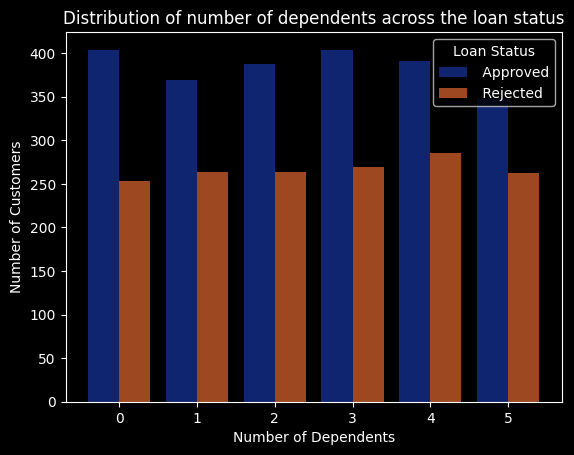

In [15]:
df2 = pd.DataFrame(df.groupby(['Loan Status','no_of_dependents'],observed=True)["loan_id"].count())
df2.reset_index(inplace = True)
df2.columns

sns.barplot(x='no_of_dependents',y='loan_id',data=df2,hue='Loan Status',palette='dark')
plt.title('Distribution of number of dependents across the loan status')
plt.xlabel('Number of Dependents')
plt.ylabel('Number of Customers')
plt.plot()

del df2

pd.crosstab(df['no_of_dependents'],df['Loan Status'])

The number of dependents don't have any influence over anything🤯🤯🤯<br>
Now lets look at the **Education Level**

In [16]:
#Does education level have influence over the credit score?
model= ols('Q("Credit Score")~Q("Education Level")',data=df).fit()
ANOVA=sm.stats.anova_lm(model,type=2)
print(ANOVA)
print("\n Credit Score doesn't have a relationship with Education level")

del model
del ANOVA

Approved = df[df['Education Level'] == ' Graduate'][['Credit Score',"loan_id"]]
Rejected = df[df['Education Level'] == ' Not Graduate'][['Credit Score',"loan_id"]]
print(stats.ttest_ind(Approved["Credit Score"], Rejected["Credit Score"]))

del Approved
del Rejected

                          df        sum_sq       mean_sq         F    PR(>F)
Q("Education Level")     1.0  4.029604e+03   4029.603839  0.160045  0.689137
Residual              3900.0  9.819380e+07  25177.897365       NaN       NaN

 Credit Score doesn't have a relationship with Education level
TtestResult(statistic=-0.4000566062123697, pvalue=0.6891367345065097, df=3900.0)


In [17]:
print(df['Education Level'].unique())

[' Graduate', ' Not Graduate']
Categories (2, object): [' Graduate', ' Not Graduate']


In [18]:
#Does Education level have a relationship with loan amount?
model= ols('loan_amount~Q("Education Level")',data=df).fit()
ANOVA=sm.stats.anova_lm(model,type=2)
print(ANOVA)

del model
del ANOVA

print("\n No evidence to conclude that their relationship is statistically significant \n")

model= ols('Q("Monthly Income")~Q("Education Level")',data=df).fit()
ANOVA=sm.stats.anova_lm(model,type=2)
print(ANOVA)

del model
del ANOVA

print("\n No evidence to conclude that their relationship is statistically significant")

                          df        sum_sq       mean_sq         F   PR(>F)
Q("Education Level")     1.0  1.515540e+14  1.515540e+14  1.893469  0.16889
Residual              3900.0  3.121574e+17  8.004036e+13       NaN      NaN

 No evidence to conclude that their relationship is statistically significant 

                          df        sum_sq       mean_sq         F    PR(>F)
Q("Education Level")     1.0  1.245713e+11  1.245713e+11  2.322434  0.127601
Residual              3900.0  2.091892e+14  5.363826e+10       NaN       NaN

 No evidence to conclude that their relationship is statistically significant


In [19]:
print(pd.crosstab(df["Education Level"],df["Loan Status"],margins=True))
print('\n\n')
print(pd.crosstab(df["Education Level"],df["Loan Status"],normalize='index',margins=True))

print('\n - - - - -CONDITIONAL PROBABILITIES- - - - - -\n')
pd.crosstab(df["Education Level"],df["Loan Status"],normalize=True,margins=True)

Loan Status       Approved   Rejected   All
Education Level                            
 Graduate             1166        799  1965
 Not Graduate         1138        799  1937
All                   2304       1598  3902



Loan Status      Approved  Rejected
Education Level                    
 Graduate        0.593384  0.406616
 Not Graduate    0.587506  0.412494
All              0.590466  0.409534

 - - - - -CONDITIONAL PROBABILITIES- - - - - -



Loan Status,Approved,Rejected,All
Education Level,,,
Graduate,0.298821,0.204767,0.503588
Not Graduate,0.291645,0.204767,0.496412
All,0.590466,0.409534,1.000000


The probability of a loan being approved is 0.593384 for graduates and 0.587506 for the not graduates which is a small margin to declare that the graduation status have influence over the loan status

In [20]:
#Does self employment influence credit score and loan approval status?🤔🤔🤔
print(df['self_employed'].unique())

Yes = df[df['self_employed'] == ' Yes'][['Credit Score',"loan_id"]]
No = df[df['self_employed'] == ' No'][['Credit Score',"loan_id"]]
print(stats.ttest_ind(Yes["Credit Score"], No["Credit Score"]))

del Yes
del No

print('\n')
print(pd.crosstab(df['self_employed'],df['Loan Status'],normalize=True,margins=True))
print('\n')
print(pd.crosstab(df['self_employed'],df['Loan Status'],margins=True))
print('\n')
print(pd.crosstab(df['self_employed'],df['Loan Status'],margins=True,normalize='index'))

[' No', ' Yes']
Categories (2, object): [' No', ' Yes']
TtestResult(statistic=-0.7226193190488042, pvalue=0.46995712489803987, df=3900.0)


Loan Status     Approved   Rejected       All
self_employed                                
 No             0.294464   0.203742  0.498206
 Yes            0.296002   0.205792  0.501794
All             0.590466   0.409534  1.000000


Loan Status     Approved   Rejected   All
self_employed                            
 No                 1149        795  1944
 Yes                1155        803  1958
All                 2304       1598  3902


Loan Status    Approved  Rejected
self_employed                    
 No            0.591049  0.408951
 Yes           0.589888  0.410112
All            0.590466  0.409534


Self Employment doesn't affect either credit score or the loan status. My conclusion is due to the low variations between the probabilities and the high pvalue, but with a larger sample of data, we can come with a better conclusion. Lets check at the loan amount

In [21]:
Yes = df[df['self_employed'] == ' Yes'][['loan_amount',"loan_id"]]
No = df[df['self_employed'] == ' No'][['loan_amount',"loan_id"]]
print(stats.ttest_ind(Yes["loan_amount"], No["loan_amount"]))

del Yes
del No

Yes = df[df['self_employed'] == ' Yes'][['Monthly Income',"loan_id"]]
No = df[df['self_employed'] == ' No'][['Monthly Income',"loan_id"]]
print(stats.ttest_ind(Yes["Monthly Income"], No["Monthly Income"]))

del Yes
del No



TtestResult(statistic=0.510747298290754, pvalue=0.6095569251058802, df=3900.0)
TtestResult(statistic=0.48188516421814254, pvalue=0.6299145655246785, df=3900.0)


Self employment has little relationship with credit score and loan status, this is tested using probabilities and ttest as shown above. We can fairly conclude that **Self Employment** Has little to do with loan status and credit score

**Q4 Does Income to loan amount ratio affect the Loan Status?🤔🤔**

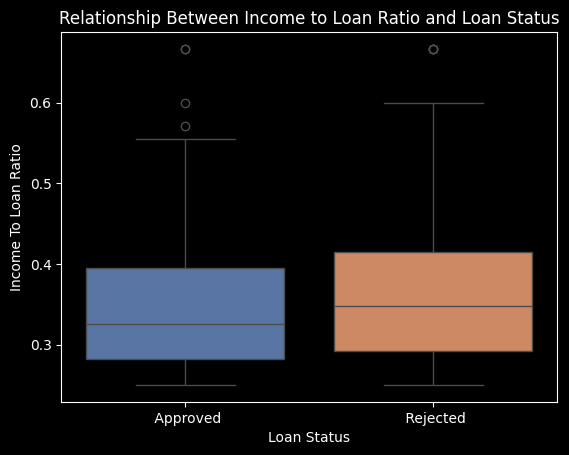

Index(['index', 'Annual Income to Loan Amount Ratio', 'loan_id'], dtype='object')
Index(['index', 'Annual Income to Loan Amount Ratio', 'loan_id'], dtype='object')
TtestResult(statistic=-6.150790291444395, pvalue=8.486046700910148e-10, df=3900.0)


 The avarage Annual Income to Loan Amount Ratio is:  0.3492333675038442  with each group having: 
Loan Status
Approved    0.343200
Rejected    0.357932
Name: Annual Income to Loan Amount Ratio, dtype: float64


In [22]:
#Lets try using box plots to analyse their relationship

sns.boxplot(x='Loan Status',y='Annual Income to Loan Amount Ratio',data=df,palette='deep',hue='Loan Status',legend=False)
plt.title("Relationship Between Income to Loan Ratio and Loan Status")
plt.ylabel("Income To Loan Ratio")
plt.xlabel('Loan Status')
plt.show()


#Lets try using a ttest to see if their is a significant difference bewteen the ratio.

Approved = df[df['Loan Status'] == ' Approved'][['Annual Income to Loan Amount Ratio','loan_id']]
Rejected = df[df['Loan Status'] == ' Rejected'][['Annual Income to Loan Amount Ratio','loan_id']]

Approved.reset_index(inplace=True)
Rejected.reset_index(inplace=True)
print(Approved.columns)
print(Rejected.columns)

print(stats.ttest_ind(Approved['Annual Income to Loan Amount Ratio'],Rejected['Annual Income to Loan Amount Ratio']))

del Approved
del Rejected

print("\n\n The avarage Annual Income to Loan Amount Ratio is: ",statistics.mean(df['Annual Income to Loan Amount Ratio'])," with each group having: ")
print(df.groupby('Loan Status',observed=True)['Annual Income to Loan Amount Ratio'].mean())

The other factor that has influence over the loan status is **Annual Income to Loan Amount Ratio**.According to the box plot above people who tend to borrow money that has a higher ratio tends to be rejected for a loan and a lower ratio attracts a huge rate of success.

In [23]:
#Does Annual Income to Loan Amount Ratio have a relationship with credit score?
a = df['Annual Income to Loan Amount Ratio'].corr(df['Credit Score'])
print("""The correlation between income to loan Ratio is """,a,""" this is a low correlation which is negligible and
we can conclude that the ratio has no relationship with the credit score, which is no surprise 
considering that both someone income and loan amount has no relationship with credit score""")

The correlation between income to loan Ratio is  -0.011445211108785103  this is a low correlation which is negligible and
we can conclude that the ratio has no relationship with the credit score, which is no surprise 
considering that both someone income and loan amount has no relationship with credit score


**5. Does the loan term and amount affect the approval status?**

The overall correlation between loan amount and loan term is  0.0046304155165898826  while the independent based on approval status is 
                         loan_amount  loan_term
Loan Status                                    
Approved    loan_amount     1.000000  -0.000043
            loan_term      -0.000043   1.000000
Rejected    loan_amount     1.000000   0.020666
            loan_term       0.020666   1.000000
10


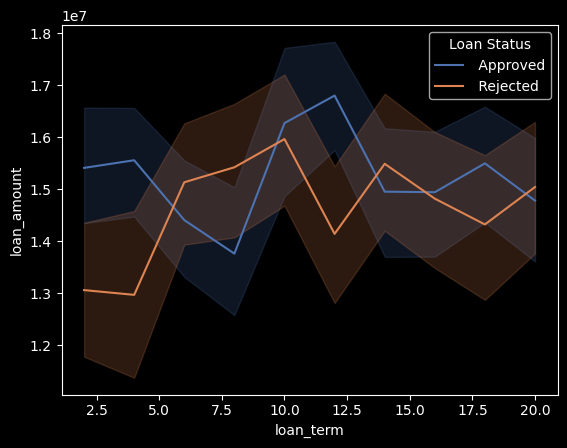

In [24]:
#Is there a relationship between loan amount and loan term
print("The overall correlation between loan amount and loan term is ",df['loan_amount'].corr(df['loan_term'])," while the independent based on approval status is ")

print(df.groupby('Loan Status')[['loan_amount','loan_term']].corr())

print(df['loan_term'].nunique())

sns.lineplot(x = 'loan_term',y = 'loan_amount',data=df,palette='deep',hue='Loan Status')
plt.show()

In [25]:
#Since the graph seems to display some kind of reltionship, lets try to test if the relationship between loan_amount:loan_term and loan status exists
df['Loan Amount to Loan Term Ratio'] = round((df['loan_amount']/df['loan_term']),4)

approved = df[df['Loan Status'] == ' Approved'][['Loan Amount to Loan Term Ratio','loan_id']]
Notapproved = df[df['Loan Status'] == ' Rejected'][['Loan Amount to Loan Term Ratio','loan_id']]

print(stats.ttest_ind(approved['Loan Amount to Loan Term Ratio'],Notapproved['Loan Amount to Loan Term Ratio']))

del approved
del Notapproved

TtestResult(statistic=8.971444866462653, pvalue=4.45310091764395e-19, df=3900.0)


In [26]:
approved = df[df['Loan Status'] == ' Approved'][['loan_term','loan_amount','loan_id']]
Notapproved = df[df['Loan Status'] == ' Rejected'][['loan_term','loan_amount','loan_id']]

print(stats.ttest_ind(approved['loan_term'],Notapproved['loan_term']))
print("\n")
print(stats.ttest_ind(approved['loan_amount'],Notapproved['loan_amount']))

del approved
del Notapproved

TtestResult(statistic=-7.721910961234217, pvalue=1.446885522465341e-14, df=3900.0)


TtestResult(statistic=1.509998736746192, pvalue=0.13112475686204156, df=3900.0)


Since the pvalue is very low for the ttest of **loan term** and loan status, we reject the **H<sub>0</sub>** and conclude that the loan term has an influence over the loan status<br>
There is an extremely low relationship between the loan term and the loan amount. The correlation between the 2 variables is extremely low

**6. Is there a relationship between the asset value and a person’s self-employment status, income, and loan amount?**<br><br>
***Residential Asset Value*** is the value of the residential property a borower owns.<br>
***commercial_assets_value*** is the value of property that one has and are used for busines purposes, eg office buildings, shops<br>
***Luxury Asset Value*** is the value of items that someone has and are not essential for their daily needs such as jewellery, gold watch, artifacts, etc<br>
***Bank Asset Value*** this includes direct cash that someone has access to.

In [27]:
print(pd.DataFrame(df[['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']].corr()))
print("\n")
print(df.groupby('Loan Status',observed=True)[['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']].corr())

                          residential_assets_value  commercial_assets_value  \
residential_assets_value                  1.000000                 0.402975   
commercial_assets_value                   0.402975                 1.000000   
luxury_assets_value                       0.585192                 0.587766   
bank_asset_value                          0.515027                 0.538207   

                          luxury_assets_value  bank_asset_value  
residential_assets_value             0.585192          0.515027  
commercial_assets_value              0.587766          0.538207  
luxury_assets_value                  1.000000          0.785580  
bank_asset_value                     0.785580          1.000000  


                                      residential_assets_value  \
Loan Status                                                      
Approved    residential_assets_value                  1.000000   
            commercial_assets_value                   0.410427   
        

In [28]:
#Their relationships is good such that a change in one will most likely affect the rest, but does it have a relationship with the loan status?

def ttestFunction(x):
    print("\n The relationship between Loan Status and ",x)
    Approved = df[df['Loan Status'] == ' Approved'][[x,'loan_id']]
    Rejected = df[df['Loan Status'] == ' Rejected'][[x,'loan_id']]
    print(stats.ttest_ind(Approved[x],Rejected[x]))
    del Approved
    del Rejected

    return "Done"

ttestFunction('residential_assets_value')
ttestFunction('commercial_assets_value')
ttestFunction('luxury_assets_value')
ttestFunction('bank_asset_value')



 The relationship between Loan Status and  residential_assets_value
TtestResult(statistic=-1.20554117441189, pvalue=0.22806758982579042, df=3900.0)

 The relationship between Loan Status and  commercial_assets_value
TtestResult(statistic=0.7997087089983675, pvalue=0.423928290657687, df=3900.0)

 The relationship between Loan Status and  luxury_assets_value
TtestResult(statistic=-0.46379039020169716, pvalue=0.6428238125769052, df=3900.0)

 The relationship between Loan Status and  bank_asset_value
TtestResult(statistic=-0.21811553243548287, pvalue=0.8273505070886193, df=3900.0)


'Done'

If we look at them directly, we come up to the conclusions that they dont affect the loan status, but lets try to look at them in the view of ratios to loan amount

In [29]:
#Lets find the ratios
df['Residential Value to Loan Ratio'] = (df['residential_assets_value']/df['loan_amount'])
df['Commercial Value to Loan Ratio'] = (df['commercial_assets_value']/df['loan_amount'])
df['Luxury Value to Loan Ratio'] = (df['luxury_assets_value']/df['loan_amount'])
df['Bank Value to Loan Ratio'] = (df['bank_asset_value']/df['loan_amount'])

try:
    ttestFunction('Residential Value to Loan Ratio')
    ttestFunction('Commercial Value to Loan Ratio')
    ttestFunction('Luxury Value to Loan Ratio')
    ttestFunction('Bank Value to Loan Ratio')

    del ttestFunction
except:
    print("Run the previous cell first")
finally:
    print('\n')
    print(df[['Residential Value to Loan Ratio','Commercial Value to Loan Ratio','Luxury Value to Loan Ratio','Bank Value to Loan Ratio']].corr())


 The relationship between Loan Status and  Residential Value to Loan Ratio
TtestResult(statistic=-1.525824055986078, pvalue=0.12713477513829632, df=3900.0)

 The relationship between Loan Status and  Commercial Value to Loan Ratio
TtestResult(statistic=-1.0091557308775692, pvalue=0.31296255885248175, df=3900.0)

 The relationship between Loan Status and  Luxury Value to Loan Ratio
TtestResult(statistic=-4.256248511933033, pvalue=2.1277455928966472e-05, df=3900.0)

 The relationship between Loan Status and  Bank Value to Loan Ratio
TtestResult(statistic=-3.090975313032855, pvalue=0.0020090797436048847, df=3900.0)


                                 Residential Value to Loan Ratio  \
Residential Value to Loan Ratio                         1.000000   
Commercial Value to Loan Ratio                          0.088639   
Luxury Value to Loan Ratio                              0.250319   
Bank Value to Loan Ratio                                0.148077   

                                 Com

In [30]:
print(df['self_employed'].unique())

def ttester(x):
    print("\n\nYou are testing the relationship between self employed and ",x)
    Self = df[df['self_employed'] == ' Yes'][[x,'loan_id']]
    NotSelf = df[df['self_employed'] == ' No'][[x,'loan_id']]
    print(stats.ttest_ind(Self[x],NotSelf[x]))
    del Self
    del NotSelf
    return 'Done'

ttester('residential_assets_value')
ttester('commercial_assets_value')
ttester('luxury_assets_value')
ttester('bank_asset_value')
ttester('Residential Value to Loan Ratio')
ttester('Commercial Value to Loan Ratio')
ttester('Luxury Value to Loan Ratio')
ttester('Bank Value to Loan Ratio')

del ttester

[' No', ' Yes']
Categories (2, object): [' No', ' Yes']


You are testing the relationship between self employed and  residential_assets_value
TtestResult(statistic=1.0643012464312103, pvalue=0.28725814326112364, df=3900.0)


You are testing the relationship between self employed and  commercial_assets_value
TtestResult(statistic=-0.9339494785345043, pvalue=0.35038777320183867, df=3900.0)


You are testing the relationship between self employed and  luxury_assets_value
TtestResult(statistic=0.6379466962752092, pvalue=0.5235458326106627, df=3900.0)


You are testing the relationship between self employed and  bank_asset_value
TtestResult(statistic=0.19881481776923554, pvalue=0.8424179678812106, df=3900.0)


You are testing the relationship between self employed and  Residential Value to Loan Ratio
TtestResult(statistic=0.8459598423717692, pvalue=0.3976270470039638, df=3900.0)


You are testing the relationship between self employed and  Commercial Value to Loan Ratio
TtestResult(statist

Self Employment has no effect on the asset value one has

In [31]:
print("The relationship between Annual Income and residential_assets_value is",df['Annual Income'].corr(df['residential_assets_value']))
print("The relationship between Annual Income and commercial_assets_value is",df['Annual Income'].corr(df['commercial_assets_value']))
print("The relationship between Annual Income and luxury_assets_value is",df['Annual Income'].corr(df['luxury_assets_value']))
print("The relationship between Annual Income and bank_asset_value is",df['Annual Income'].corr(df['bank_asset_value']))


The relationship between Annual Income and residential_assets_value is 0.6274044301181726
The relationship between Annual Income and commercial_assets_value is 0.633417311948059
The relationship between Annual Income and luxury_assets_value is 0.9284655975188704
The relationship between Annual Income and bank_asset_value is 0.8486153348392853


There is a good relationship between income and the asset value one has especially the luxury asset and bank assets

In [32]:
print("The relationship between loan_amount and residential_assets_value is",df['loan_amount'].corr(df['residential_assets_value']))
print("The relationship between loan_amount and commercial_assets_value is",df['loan_amount'].corr(df['commercial_assets_value']))
print("The relationship between loan_amount and luxury_assets_value is",df['loan_amount'].corr(df['luxury_assets_value']))
print("The relationship between loan_amount and bank_asset_value is",df['loan_amount'].corr(df['bank_asset_value']))

The relationship between loan_amount and residential_assets_value is 0.5884037006815697
The relationship between loan_amount and commercial_assets_value is 0.5928820429634867
The relationship between loan_amount and luxury_assets_value is 0.8621515805518116
The relationship between loan_amount and bank_asset_value is 0.784328440850074


In [33]:
#Lets create a silly column of Networth
df['Net Asset Value'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']

print(df['Net Asset Value'].corr(df['loan_amount']))

df.groupby('Loan Status',observed=True)[['loan_amount','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value','Net Asset Value']].corr()

0.8662659968905297


loan_amount  residential_assets_value  \
Loan Status                                                                   
Approved    loan_amount                  1.000000                  0.586591   
            residential_assets_value     0.586591                  1.000000   
            commercial_assets_value      0.620694                  0.410427   
            luxury_assets_value          0.869931                  0.582398   
            bank_asset_value             0.795410                  0.510972   
            Net Asset Value              0.875696                  0.779682   
Rejected    loan_amount                  1.000000                  0.593846   
            residential_assets_value     0.593846                  1.000000   
            commercial_assets_value      0.550333                  0.393294   
            luxury_assets_value          0.851583                  0.589408   
            bank_asset_value             0.768287                  0.521152   
            Net Asset Value              0.853320                  0.790162   

                                      commercial_assets_value  \
Loan Status                                                     
Approved    loan_amount                              0.620694   
            residential_assets_value                 0.410427   
            commercial_assets_value                  1.000000   
            luxury_assets_value                      0.603630   
            bank_asset_value                         0.570427   
            Net Asset Value                          0.739443   
Rejected    loan_amount                              0.550333   
            residential_assets_value                 0.393294   
            commercial_assets_value                  1.000000   
            luxury_assets_value                      0.564657   
            bank_asset_value                         0.490688   
            Net Asset Value                          0.705288   

                                      luxury_assets_value  bank_asset_value  \
Loan Status                                                                   
Approved    loan_amount                          0.869931          0.795410   
            residential_assets_value             0.582398          0.510972   
            commercial_assets_value              0.603630          0.570427   
            luxury_assets_value                  1.000000          0.782923   
            bank_asset_value                     0.782923          1.000000   
            Net Asset Value                      0.929845          0.833161   
Rejected    loan_amount                          0.851583          0.768287   
            residential_assets_value             0.589408          0.521152   
            commercial_assets_value              0.564657          0.490688   
            luxury_assets_value                  1.000000          0.789552   
            bank_asset_value                     0.789552          1.000000   
            Net Asset Value                      0.928397          0.825147   

                                      Net Asset Value  
Loan Status                                            
Approved    loan_amount                      0.875696  
            residential_assets_value         0.779682  
            commercial_assets_value          0.739443  
            luxury_assets_value              0.929845  
            bank_asset_value                 0.833161  
            Net Asset Value                  1.000000  
Rejected    loan_amount                      0.853320  
            residential_assets_value         0.790162  
            commercial_assets_value          0.705288  
            luxury_assets_value              0.928397  
            bank_asset_value                 0.825147  
            Net Asset Value                  1.000000

In [34]:
#Does Someones net asset value have a relationship with loan approval status?

Accepted = df[df['Loan Status'] == ' Approved'][['loan_id','Net Asset Value']]
Rejected = df[df['Loan Status'] == ' Rejected'][['loan_id','Net Asset Value']]

print(stats.ttest_ind(Accepted['Net Asset Value'],Rejected['Net Asset Value']))

del Accepted
del Rejected

df['Net Asset Value to Loan Amount Ratio'] = df['Net Asset Value'] / df['loan_amount']

Accepted = df[df['Loan Status'] == ' Approved'][['loan_id','Net Asset Value to Loan Amount Ratio']]
Rejected = df[df['Loan Status'] == ' Rejected'][['loan_id','Net Asset Value to Loan Amount Ratio']]

print(stats.ttest_ind(Accepted['Net Asset Value to Loan Amount Ratio'],Rejected['Net Asset Value to Loan Amount Ratio']))

del Accepted
del Rejected

TtestResult(statistic=-0.47468697253160713, pvalue=0.6350366832170105, df=3900.0)
TtestResult(statistic=-3.7899002011989693, pvalue=0.00015298392811585658, df=3900.0)


Using the ttest of Net Asset Value to Loan Amount Ratio in respect to loan status, we reject H<sub>0</sub> because the 
pvalue=0.00015298392811585658 and we conclude that the Net Asset to Loan amount Ratio has an effect on the loan status

**Machine Learning Modeling**<br>
We are going to use Logistic regression to build a model for this data. This is because, we are dealing with a binary decision making that is Approved or Reject

In [35]:
#Lets import the necessary libraries needed for this
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score


In [54]:
#Lets split the data 
y = df['Loan Status']
x = df[['Annual Income to Loan Amount Ratio','Credit Score','loan_amount','loan_term']]

Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size = 0.2,random_state=42)
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)
df.columns

(3121, 4)
(781, 4)
(3121,)
(781,)


Index(['loan_id', 'no_of_dependents', 'Education Level', 'self_employed',
       'Annual Income', 'loan_amount', 'loan_term', 'Credit Score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'Loan Status',
       'Monthly Income', 'Annual Income to Loan Amount Ratio',
       'Loan Amount to Loan Term Ratio', 'Residential Value to Loan Ratio',
       'Commercial Value to Loan Ratio', 'Luxury Value to Loan Ratio',
       'Bank Value to Loan Ratio', 'Net Asset Value',
       'Net Asset Value to Loan Amount Ratio'],
      dtype='object')

In [37]:
classifier = LogisticRegression(solver='lbfgs',random_state=42)
classifier.fit(Xtrain,Ytrain)
Ypredict = classifier.predict(Xtest)
print("Accuracy Score",accuracy_score(Ypredict,Ytest))

print("\n-----ANOTHER ONE----")
classifier = LogisticRegression(solver='liblinear',random_state=42)
classifier.fit(Xtrain,Ytrain)

Ypredict = classifier.predict(Xtest)
print("The accuracy score is",accuracy_score(Ypredict,Ytest))
print("The precision score is",precision_score(Ypredict,Ytest,pos_label=' Approved'))
print("The F1_Score is",f1_score(Ypredict,Ytest,pos_label=' Approved'))
print(" \n ")
print("The precision score is",precision_score(Ypredict,Ytest,pos_label=' Rejected'))
print("The F1_Score is",f1_score(Ypredict,Ytest,pos_label=' Rejected'))

Accuracy Score 0.7631241997439181

-----ANOTHER ONE----
The accuracy score is 0.615877080665813
The precision score is 0.9698924731182795
The F1_Score is 0.7504159733777038
 
 
The precision score is 0.0949367088607595
The F1_Score is 0.16666666666666666


Since our accuracy score is below 90,lets try adjustments of Hyper parameters. We will try using **Grid Search Cross Validation** to find the best parameters to use in the models

In [52]:
#Since every time it shows that the lbfgs doesnt converge, lets try using the 
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'tol': [1e-4, 1e-3, 1e-2],
    'max_iter': [100,120,140,160,180,200]
}

# Create a logistic regression model
classifier = LogisticRegression(class_weight='balanced',solver='liblinear')

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(Xtrain, Ytrain)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 1, 'max_iter': 120, 'penalty': 'l1', 'tol': 0.001}
Best Score: 0.915411282051282


In [55]:
#Since now we have the best parameters, we can re-create our model

a = LogisticRegression(solver='liblinear',C=1,max_iter=120,penalty='l1',tol=0.001,class_weight='balanced',random_state=42)
a.fit(Xtrain,Ytrain)

Ypredict = a.predict(Xtest)
print("The accuracy score is",accuracy_score(Ypredict,Ytest))
print("The precision score is",precision_score(Ypredict,Ytest,pos_label=' Approved'))
print("The F1_Score is",f1_score(Ypredict,Ytest,pos_label=' Approved'))
print("\nFor Rejected Loans")
print("The precision score is",precision_score(Ypredict,Ytest,pos_label=' Rejected'))
print("The F1_Score is",f1_score(Ypredict,Ytest,pos_label=' Rejected'))

The accuracy score is 0.9206145966709347
The precision score is 0.9092920353982301
The F1_Score is 0.9298642533936652

For Rejected Loans
The precision score is 0.9361702127659575
The F1_Score is 0.9085545722713865


In [45]:
from sklearn.ensemble import BaggingClassifier

base_estimator = LogisticRegression(solver='liblinear', C=1, max_iter=100, penalty='l1', tol=0.0001, class_weight='balanced', random_state=42)

# Create the Bagging classifier
bagging = BaggingClassifier(estimator=base_estimator, n_estimators=20)

bagging.fit(Xtrain,Ytrain)

ypred = bagging.predict(Xtest)

print("The accuracy score is",accuracy_score(ypred,Ytest))
print("The precision score is",precision_score(ypred,Ytest,pos_label=' Approved'))
print("The F1_Score is",f1_score(ypred,Ytest,pos_label=' Approved'))
print("\nFor Rejected Loans")
print("The precision score is",precision_score(ypred,Ytest,pos_label=' Rejected'))
print("The F1_Score is",f1_score(ypred,Ytest,pos_label=' Rejected'))


The accuracy score is 0.9218950064020487
The precision score is 0.9096774193548387
The F1_Score is 0.9327453142227122

For Rejected Loans
The precision score is 0.939873417721519
The F1_Score is 0.9068702290076336


In [41]:
#I take no ownership to this😂😂
#For educational purpose, lets try using feature selection method
from sklearn.feature_selection import RFECV

df1 = df.copy()
df1 = pd.get_dummies(df1,columns=['Education Level', 'self_employed'])

X = df1[['loan_id','no_of_dependents','Annual Income','loan_amount','loan_term','Credit Score','residential_assets_value', 'commercial_assets_value',
        'luxury_assets_value','bank_asset_value','Monthly Income','Annual Income to Loan Amount Ratio','Residential Value to Loan Ratio','Commercial Value to Loan Ratio',
       'Luxury Value to Loan Ratio','Bank Value to Loan Ratio','Net Asset Value','Net Asset Value to Loan Amount Ratio','Education Level_ Graduate', 
       'Education Level_ Not Graduate','self_employed_ No','self_employed_ Yes','Loan Amount to Loan Term Ratio']]
       
Y = df1['Loan Status']
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size=0.2,random_state=42)
estimator = LogisticRegression(solver='liblinear', C=1, max_iter=140, penalty='l1', tol=0.0001, class_weight='balanced', random_state=42)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(xTrain, yTrain)
X_new = selector.transform(xTrain)
print("Selected Features:", selector.support_)
print("Feature Ranking:", selector.ranking_)

print("\nNOW TO BUILD THE MODEL USING THE FEATURES THAT THE RECURSIVE FEATURE ELIMINATOR HAS SUGGESTED\n")
X = df1[['loan_term', 'Credit Score','Annual Income to Loan Amount Ratio','Residential Value to Loan Ratio','Commercial Value to Loan Ratio',    'Education Level_ Not Graduate','self_employed_ No','Loan Amount to Loan Term Ratio']]
Y =df1['Loan Status']

xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size=0.3)
a = LogisticRegression(solver='liblinear',C=1,max_iter=140,penalty='l1',tol=0.0001,class_weight='balanced',random_state=42)
a.fit(xTrain,yTrain)

Ypredict = a.predict(xTest)
print("The accuracy score is",accuracy_score(Ypredict,yTest))
print("The precision score is",precision_score(Ypredict,yTest,pos_label=' Approved'))
print("The F1_Score is",f1_score(Ypredict,yTest,pos_label=' Approved'))
print("\nFor Rejected Loans")
print("The precision score is",precision_score(Ypredict,yTest,pos_label=' Rejected'))
print("The F1_Score is",f1_score(Ypredict,yTest,pos_label=' Rejected'))

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Us

Selected Features: [ True  True False False  True  True False False False False  True  True
  True  True False False False False False  True  True False False]
Feature Ranking: [ 1  1  3 10  1  1  8  6  5  7  1  1  1  1  4 12  9 13 14  1  1 11  2]

NOW TO BUILD THE MODEL USING THE FEATURES THAT THE RECURSIVE FEATURE ELIMINATOR HAS SUGGESTED

The accuracy score is 0.9180187873612298
The precision score is 0.9082706766917293
The F1_Score is 0.9263803680981595

For Rejected Loans
The precision score is 0.9308300395256917
The F1_Score is 0.9075144508670521


In [42]:
print(df.columns)
print(df.shape)

Index(['loan_id', 'no_of_dependents', 'Education Level', 'self_employed',
       'Annual Income', 'loan_amount', 'loan_term', 'Credit Score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'Loan Status',
       'Monthly Income', 'Annual Income to Loan Amount Ratio',
       'Loan Amount to Loan Term Ratio', 'Residential Value to Loan Ratio',
       'Commercial Value to Loan Ratio', 'Luxury Value to Loan Ratio',
       'Bank Value to Loan Ratio', 'Net Asset Value',
       'Net Asset Value to Loan Amount Ratio'],
      dtype='object')
(3902, 22)
